- 워드클라우드 만들 때 주의점 : 글자(character)단위가 되지 않게 단어 단위로 구분할 것(10, 11번째 실행탭 str/list 차이 참고)
```
<Text: M 7 5 1   E 1 1...>,
 <Text: M751 E1164 N308 E1164 H6531 M751 M751 M751...>
```
- 사진 저장시 주의점 : plt.show() 명령은 그래프를 띄운 후 메모리를 비우기 때문에 savefig 명령어가 듣지 않음(텅 빈 그림을 저장)

 -> #plt.show()처럼 주석 처리를 해주거나 저장을 먼저 해야 함

- plt에 포함되지 않은 방식의 그래프도 텅 빈 그래프가 저장될 수 있는데 이 경우엔 box를 새로 만들어서 그 안에 담는 방식으로 그래프를 그린 뒤 box째로 그래프를 저장하면 됨(마지막 부분 빈도/WC 그래프 코드 차이 참고)
```
x = nltk.Text(example)
plt.figure(figsize=(15,6))
x.plot(20)
plt.savefig('file.png')
```
대신
```
x = nltk.Text(example)
box = plt.figure(figsize=(15,6))
x.plot(20)
box.savefig('file.png')
```

In [1]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
# 런타임 다시 시작

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 자료 불러오기 / 확인해보기

In [1]:
import pandas as pd

In [2]:
healthcare_link = '/content/drive/MyDrive/4조_헬스케어/자료파일/1차전처리/healthcare_edit.csv'
hc = pd.read_csv(healthcare_link, encoding='UTF-8')
hc

,Unnamed: 0,가입자 일련번호,연령대코드,시도코드,서식코드,진료과목코드,주상병코드,입내원일수,심결가산율,심결요양급여비용총액
0,0,1,12,36,3,5,M751,1,0.25,19240
1,1,1,12,36,3,1,E1164,1,0.25,145680
2,2,1,12,36,3,1,N308,1,0.25,13240
3,3,1,12,36,2,1,E1164,21,0.25,861590
4,4,1,12,36,3,13,H6531,1,0.15,48440
...,...,...,...,...,...,...,...,...,...,...
13178340,13178340,1000000,1,37,3,21,P220,1,0.30,71000
13178341,13178341,1000000,1,37,3,11,J209,1,0.20,17620
13178342,13178342,1000000,1,37,3,12,H351,1,0.25,31890
13178343,13178343,1000000,1,37,2,11,P220,12,0.25,1757040


https://jamdol.tistory.com/91 / 시도코드참조

https://www.hira.or.kr/re/cmmn/sickSym/list.do / 주상병코드참조

In [3]:
df = hc[['주상병코드']]
df = df.reset_index(drop=True)
df

,주상병코드
0,M751
1,E1164
2,N308
3,E1164
4,H6531
...,...
13178340,P220
13178341,J209
13178342,H351
13178343,P220


In [4]:
len(df.주상병코드.unique()), df.주상병코드.unique()

(9422, array(['M751', 'E1164', 'N308', ..., 'M8419', 'T794', 'M6137'],
       dtype=object))

## 기준(주상병코드) 단어 담기 / 확인해보기

In [5]:
disease_str = " ".join(word for word in df.주상병코드.astype(str))

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

In [7]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
# str과 list의 차이
tokens_list = nltk.word_tokenize(disease_str)
disease_str[0], disease_str[1], disease_str[2], tokens_list[0], tokens_list[1]

('M', '7', '5', 'M751', 'E1164')

In [9]:
# nltk.Text를 시행한 결과도 달라져서 이후의 값이 달라짐
a = nltk.Text(disease_str)
b = nltk.Text(tokens_list)
a, b

(<Text: M 7 5 1   E 1 1...>,
 <Text: M751 E1164 N308 E1164 H6531 M751 M751 M751...>)

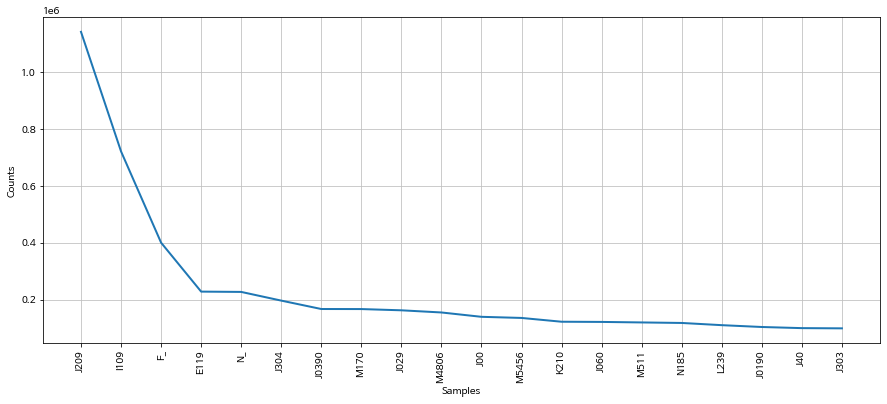

In [10]:
box = plt.figure(figsize=(15,6))
b.plot(20)
box.savefig('질병빈도_전연령.png')
plt.show()

J209	상세불명의 급성 기관지염	ACUTE BRONCHITIS, UNSPECIFIED

https://www.ekjm.org/upload/42852596.pdf

I109	상세불명의 고혈압	Unspecified hypertension

In [11]:
hc[hc.주상병코드 == 'F_']

,Unnamed: 0,가입자 일련번호,연령대코드,시도코드,서식코드,진료과목코드,주상병코드,입내원일수,심결가산율,심결요양급여비용총액
46,46,2,10,21,3,3,F_,14,0.15,42920
47,47,2,10,21,3,3,F_,14,0.15,33470
48,48,2,10,21,3,3,F_,7,0.15,29790
50,50,2,10,21,3,3,F_,14,0.15,31450
51,51,2,10,21,3,3,F_,14,0.15,29000
...,...,...,...,...,...,...,...,...,...,...
13178105,13178105,999985,18,31,3,3,F_,1,0.15,3040
13178109,13178109,999985,18,31,3,3,F_,30,0.15,173470
13178110,13178110,999985,18,31,3,3,F_,30,0.15,172810
13178113,13178113,999985,18,31,3,3,F_,1,0.15,3040


F코드?

http://www.mindpost.or.kr/news/articleView.html?idxno=2978

https://www.joongang.co.kr/article/23619053#home

N코드?

https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=yhryub&logNo=140164222396

## 워드클라우드로 만들기

In [12]:
from wordcloud import WordCloud
from PIL import Image

In [13]:
data = b.vocab().most_common(300)
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wc = WordCloud(
        font_path=path, relative_scaling=0.7,
        background_color='white'
).generate_from_frequencies(dict(data))

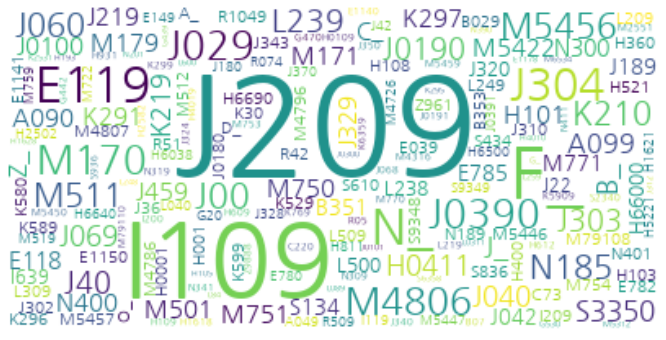

In [14]:
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.savefig('질병WC_전연령.png')
plt.show()

## 65세 이상

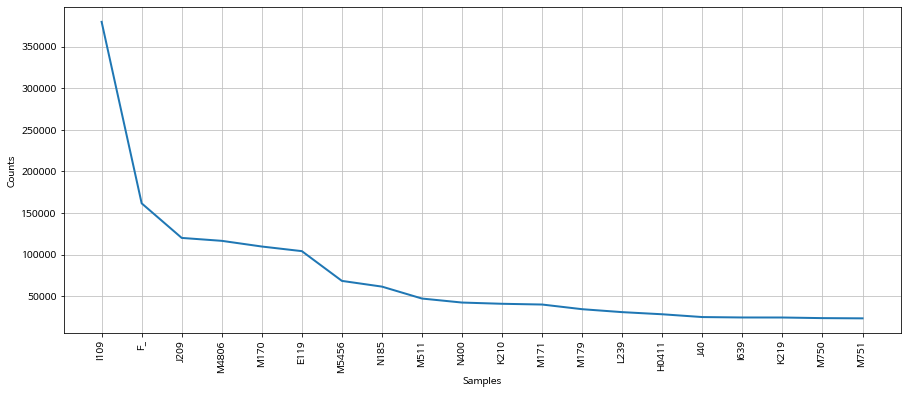

In [15]:
df = hc[['주상병코드', '연령대코드']]
df = df[hc.연령대코드 > 13]
df = df.reset_index(drop=True)

disease_str = " ".join(word for word in df.주상병코드.astype(str))
tokens_list = nltk.word_tokenize(disease_str)
b = nltk.Text(tokens_list)

box = plt.figure(figsize=(15,6))
b.plot(20)
box.savefig('질병빈도_65이상.png')
plt.show()

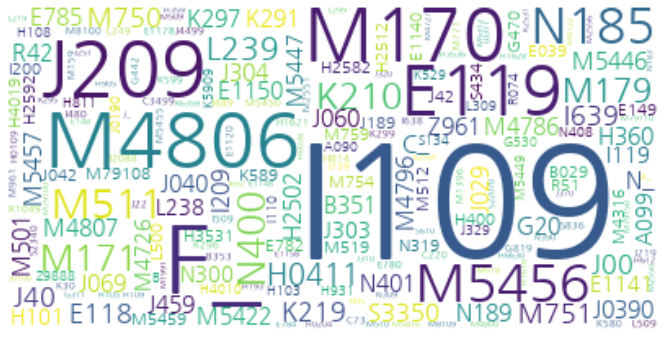

In [16]:
data = b.vocab().most_common(300)
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wc = WordCloud(
        font_path=path, relative_scaling=0.7,
        background_color='white'
).generate_from_frequencies(dict(data))

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.savefig('질병WC_65이상.png')
plt.show()